In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.tree import DecisionTreeClassifier, export_text
# from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()

In [2]:
# Load the datasets
df_train = pd.read_csv('./CVD_train2.csv')
df_test = pd.read_csv('./CVD_test2.csv')
df_test_raw = pd.read_csv('./CVD_test2.csv') # for mapping original ID's to endresult

In [3]:
# df_train.describe()

In [4]:
# df_test.describe()

In [5]:
# for col in df_train.columns:
#     print(f"Column: {col}")
#     print(df_train[col].value_counts())
#     print()

In [6]:
# for col in df_test.columns:
#     print(f"Column: {col}")
#     print(df_train[col].value_counts())
#     print()

In [7]:
# Drop outliers, top 3% of numerical data
mask = (
    (df_train['BMI'] < df_train['BMI'].quantile(0.97)) &
    (df_train['Height_(cm)'] < df_train['Height_(cm)'].quantile(0.97)) &
    (df_train['Weight_(kg)'] < df_train['Weight_(kg)'].quantile(0.97)) &
    (df_train['Alcohol_Consumption'] < df_train['Alcohol_Consumption'].quantile(0.97)) &
    (df_train['Fruit_Consumption'] < df_train['Fruit_Consumption'].quantile(0.97)) &
    (df_train['Green_Vegetables_Consumption'] < df_train['Green_Vegetables_Consumption'].quantile(0.97)) &
    (df_train['FriedPotato_Consumption'] < df_train['FriedPotato_Consumption'].quantile(0.97))
)  

In [8]:
# Apply boolean mask to remove top 3% of above values
df_train = df_train[mask]
# df_test = df_test[mask]

# ============================================================

# Data transformation

In [9]:
df_train.head(2)

,ID,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
1,2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0


# Encoding - Categorical Data

#### General_Health: label encoding

In [10]:
# See values
df_test["General_Health"].value_counts()

Very Good    22301
Good         18963
Excellent    11082
Fair          7115
Poor          2309
Name: General_Health, dtype: int64

In [11]:
health_mapping = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4}

df_train['General_Health'] = df_train['General_Health'].map(health_mapping)
df_test['General_Health'] = df_test['General_Health'].map(health_mapping)

#### Checkup: label encoding

In [12]:
# # See values
# df_test["Checkup"].value_counts()

In [13]:
checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 1,
    'Within the past 5 years': 2,
    'Within the past 2 years': 3,
    'Within the past year': 4
}

df_train['Checkup'] = df_train['Checkup'].map(checkup_mapping)
df_test['Checkup'] = df_test['Checkup'].map(checkup_mapping)

#### Age_Category: label encoding

In [14]:
# # See values
# df_test["Age_Category"].value_counts()

In [15]:
age_mapping = {
    '18-24': 1,
    '25-29': 2,
    '30-34': 3,
    '35-39': 4,
    '40-44': 5,
    '45-49': 6,
    '50-54': 7,
    '55-59': 8,
    '60-64': 9,
    '65-69': 10,
    '70-74': 11,
    '75-79': 12,
    '80+': 13
}

df_train['Age_Category'] = df_train['Age_Category'].map(age_mapping)
df_test['Age_Category'] = df_test['Age_Category'].map(age_mapping)

#### Exercise, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History: binary mapping

In [16]:
binary_mapping = {'No': 0, 'Yes': 1}

binary_columns = ['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History']
df_train[binary_columns] = df_train[binary_columns].replace(binary_mapping)
df_test[binary_columns] = df_test[binary_columns].replace(binary_mapping)

#### Sex: label encoding to 1 and 0

In [17]:
sex_mapping = {'Female': 0, 'Male': 1}

df_train['Sex'] = df_train['Sex'].map(sex_mapping)
df_test['Sex'] = df_test['Sex'].map(sex_mapping)

#### Diabetes: one-hot encoding

In [18]:
# # See values
# df_test["Diabetes"].value_counts()

In [19]:
df_train = pd.get_dummies(df_train, columns=['Diabetes'], prefix='Diabetes')
df_test = pd.get_dummies(df_test, columns=['Diabetes'], prefix='Diabetes')

#### Heart_Disease: label encoding

In [20]:
heart_disease_mapping = {'No': 0, 'Yes': 1}
df_train['Heart_Disease'] = df_train['Heart_Disease'].map(heart_disease_mapping)

# Scaling - Numerical Data

In [21]:
df_train.head(2)

,ID,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Sex,...,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Diabetes_No,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy"
0,1,3,4,0,1,0,0,0,0,0,...,28.29,0,0.0,30.0,0.0,4.0,0,0,1,0
1,2,3,4,1,0,0,0,0,0,0,...,33.47,0,4.0,12.0,3.0,16.0,0,0,1,0


In [22]:
columns_to_scale = ['BMI', 'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Weight_(kg)', 'Height_(cm)']

In [23]:
# Apply standard scaler to above columns
scaler = StandardScaler()
df_train[columns_to_scale] = scaler.fit_transform(df_train[columns_to_scale])
df_test[columns_to_scale] = scaler.transform(df_test[columns_to_scale])

In [24]:
df_train.head(2)

,ID,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Sex,...,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Diabetes_No,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy"
0,1,3,4,0,1,0,0,0,0,0,...,0.057928,0,-0.622332,0.261251,-1.291177,-0.239025,0,0,1,0
1,2,3,4,1,0,0,0,0,0,0,...,1.038007,0,-0.023729,-0.721527,-0.987741,2.171125,0,0,1,0


# ============================================================

# Feature Analysis and Selection

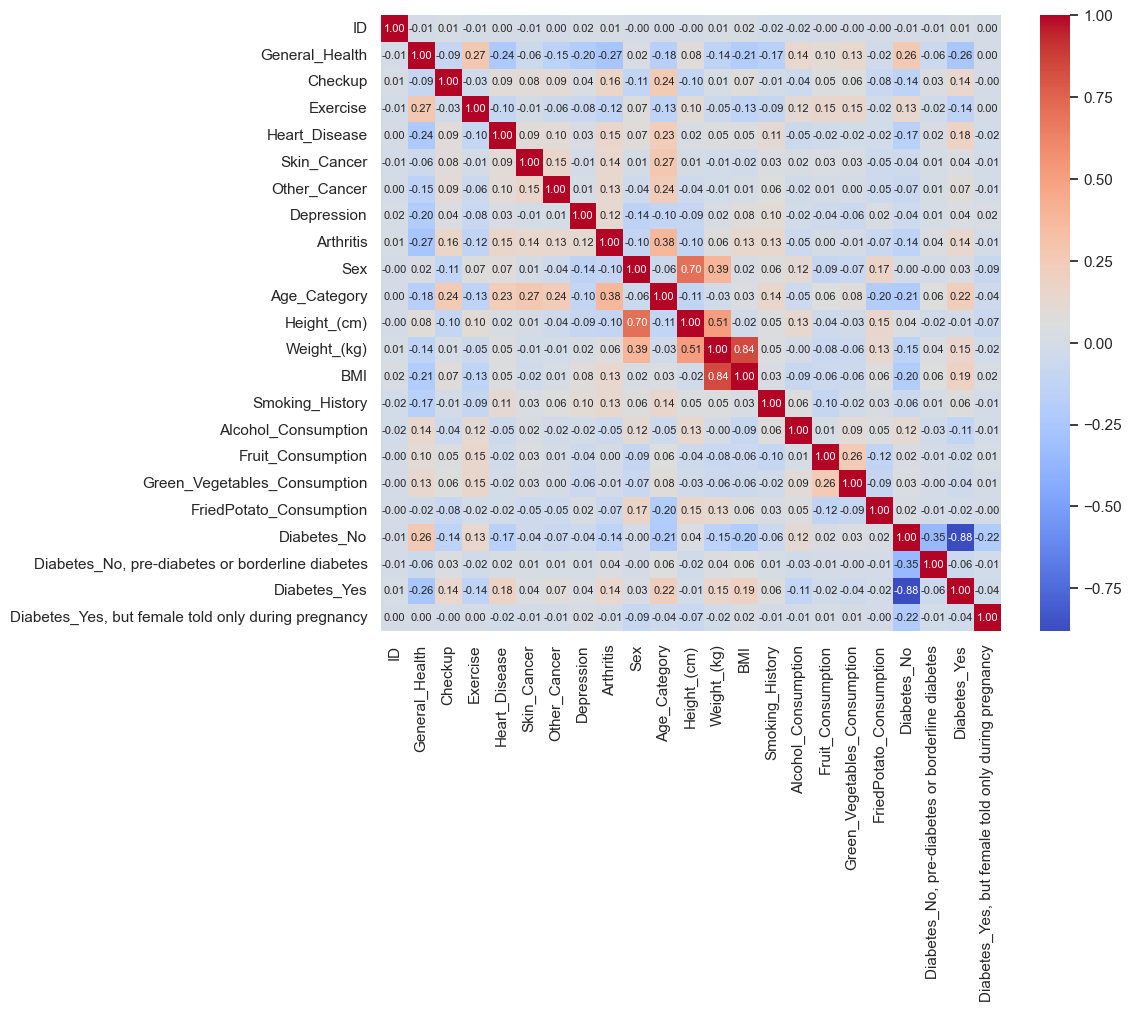

In [25]:
# Use correlation to help select which features to drop
correlation_matrix = df_train.corr()

# Create the heatmap
plt.figure(figsize = (10, 8))
font_size = 8

sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", annot_kws = {"size": font_size})

plt.show()

# ============================================================

# Logistic Regression - Training

In [26]:
# Drop columns with correlation less than |0.05| to the target variable,
# or that have high correlation with other variables other than the target variable.

columns_to_drop = ['Diabetes_No', 'ID', 'Heart_Disease', 'Depression', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Weight_(kg)', 'Height_(cm)', 
        'Diabetes_No, pre-diabetes or borderline diabetes', 'Diabetes_Yes, but female told only during pregnancy']

In [27]:
X = df_train.drop(columns_to_drop, axis = 1)
y = df_train['Heart_Disease']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize and train the Log Regression
model = LogisticRegression(random_state = 42, max_iter = 1000)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
classification_report_result = classification_report(y_val, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n, {classification_report_result}")
print(f"Confusion Matrix, {confusion_matrix(y_val, y_pred)}")

Accuracy: 0.9215
Classification Report:
,               precision    recall  f1-score   support

           0       0.93      0.99      0.96     36292
           1       0.57      0.08      0.13      3152

    accuracy                           0.92     39444
   macro avg       0.75      0.54      0.55     39444
weighted avg       0.90      0.92      0.89     39444

Confusion Matrix, [[36108   184]
 [ 2913   239]]


# ============================================================


# Logistic Regression - Prediction

In [28]:
df_test.head(2)

,ID,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Arthritis,Sex,Age_Category,...,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Diabetes_No,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy"
0,0,0,3,0,0,0,0,1,0,11,...,-2.543633,1,-0.622332,0.261251,0.327147,1.367742,1,0,0,0
1,14,4,3,1,0,0,0,0,0,11,...,-1.045134,0,-0.622332,0.261251,-0.886596,-1.042409,1,0,0,0


In [29]:
test_columns_to_drop = ['Diabetes_No', 'ID', 'Depression', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Weight_(kg)', 'Height_(cm)', 
        'Diabetes_No, pre-diabetes or borderline diabetes', 'Diabetes_Yes, but female told only during pregnancy']

In [30]:
df_test = df_test.drop(test_columns_to_drop, axis = 1)

In [31]:
df_test.head(2)

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Diabetes_Yes
0,0,3,0,0,0,1,0,11,-2.543633,1,-0.622332,0
1,4,3,1,0,0,0,0,11,-1.045134,0,-0.622332,0


In [32]:
X_test = df_test

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Create a DataFrame with 'ID' and 'Heart_Disease' columns
output_df = pd.DataFrame(
    {
    'ID': df_test_raw['ID'],       # Original ID's from untouched df_test (CVD_test2.csv)
    'Heart_Disease': y_test_pred
    }
)

# Map numerical predictions back to 'No' and 'Yes'
output_df['Heart_Disease'] = output_df['Heart_Disease'].map({0: 'No', 1: 'Yes'})

# Save the DataFrame to a CSV file
output_df.to_csv('output_predictions.csv', index = False)

In [33]:
output_df.head(4)

,ID,Heart_Disease
0,0,No
1,14,No
2,16,No
3,21,Yes


In [34]:
output_df.tail(4)

,ID,Heart_Disease
61766,308836,No
61767,308842,No
61768,308848,No
61769,308853,No


In [35]:
len(output_df) == len(df_test)

True

In [36]:
len(output_df) == len(df_test_raw)

True

# ============================================================

In [37]:
output_df['Heart_Disease'].value_counts()

No     61125
Yes      645
Name: Heart_Disease, dtype: int64

In [38]:
645/61125

0.010552147239263805